# Day_079

### 練習時間
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.models import Model, Sequential

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# 資料前處理
def preproc_x(x, flatten = True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128]):
    input_layer = Input(input_shape[1:])
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(input_layer)
        else:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(x)
    
    out = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model  

In [6]:
# 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.8, 0.9, 0.95, 1.0]

In [7]:
results = {}
"""
Build the experiment loop
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with MOMENTUM = {momentum}")
    model = build_mlp(input_shape = x_train.shape)
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer)

    model.fit(x_train, y_train, 
              epochs = EPOCHS, 
              batch_size = BATCH_SIZE, 
              validation_data = (x_test, y_test), 
              shuffle = True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 32s 640us/step - loss: 1.9147 - acc: 0.3139 - val_loss: 1.8577 - val_acc: 0.3402
Epoch 2/50
50000/50000 [==============================] - 30s 595us/step - loss: 1.7139 - acc: 0.3924 - val_loss: 1.7896 - val_acc: 0.3572
Epoch 3/50
50000/50000 [==============================] - 30s 598us/step - loss: 1.6260 - acc: 0.4272 - val_loss: 1.6319 - val_acc: 0.4145
Epoch 4/50
50000/50000 [==============================] - 29s 586us/step - loss: 1.5701 - acc: 0.4457 - val_loss: 1.6213 - val_acc: 0.4193
Epoch 5/50
50000/50000 [==============================] - 29s 586us/step - loss: 1.5260 - acc: 0.4627 - val_loss: 1.5433 - val_acc: 0.4498
Epoch 6/50
50000/50000 [==============================] - 29s 587us/step - loss: 1.4867 - acc: 0.4746 - val_loss: 1.6054 - val_acc: 0.4239
Epoch 7/50
50000/50000 [==============================] - 30s 595us/step - loss: 1.4552 - acc: 0.4857 - val_loss: 1.

50000/50000 [==============================] - 29s 590us/step - loss: 1.8450 - acc: 0.3418 - val_loss: 1.8362 - val_acc: 0.3244
Epoch 2/50
50000/50000 [==============================] - 29s 579us/step - loss: 1.6384 - acc: 0.4200 - val_loss: 1.6426 - val_acc: 0.4048
Epoch 3/50
50000/50000 [==============================] - 30s 597us/step - loss: 1.5484 - acc: 0.4530 - val_loss: 1.6528 - val_acc: 0.4233
Epoch 4/50
50000/50000 [==============================] - 30s 593us/step - loss: 1.4876 - acc: 0.4736 - val_loss: 1.6484 - val_acc: 0.3966
Epoch 5/50
50000/50000 [==============================] - 29s 575us/step - loss: 1.4340 - acc: 0.4905 - val_loss: 1.5147 - val_acc: 0.4655
Epoch 6/50
50000/50000 [==============================] - 28s 565us/step - loss: 1.3951 - acc: 0.5051 - val_loss: 1.4449 - val_acc: 0.4892
Epoch 7/50
50000/50000 [==============================] - 28s 565us/step - loss: 1.3586 - acc: 0.5204 - val_loss: 1.4546 - val_acc: 0.4783
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 29s 583us/step - loss: 1.5956 - acc: 0.4355 - val_loss: 1.5566 - val_acc: 0.4493
Epoch 3/50
50000/50000 [==============================] - 29s 580us/step - loss: 1.5089 - acc: 0.4654 - val_loss: 1.5298 - val_acc: 0.4620
Epoch 4/50
50000/50000 [==============================] - 29s 579us/step - loss: 1.4531 - acc: 0.4852 - val_loss: 1.4598 - val_acc: 0.4870
Epoch 5/50
50000/50000 [==============================] - 29s 579us/step - loss: 1.4024 - acc: 0.5023 - val_loss: 1.4653 - val_acc: 0.4750
Epoch 6/50
50000/50000 [==============================] - 29s 578us/step - loss: 1.3606 - acc: 0.5186 - val_loss: 1.4121 - val_acc: 0.4990
Epoch 7/50
50000/50000 [==============================] - 29s 584us/step - loss: 1.3250 - acc: 0.5315 - val_loss: 1.5003 - val_acc: 0.4729
Epoch 8/50
50000/50000 [==============================] - 29s 579us/step - loss: 1.2894 - acc: 0.5410 - val_loss: 1.4231 - val_acc: 0.4982
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.6884 - acc: 0.4001 - val_loss: 1.7308 - val_acc: 0.3816
Epoch 4/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.7202 - acc: 0.3831 - val_loss: 1.7537 - val_acc: 0.3639
Epoch 5/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.7732 - acc: 0.3494 - val_loss: 1.8179 - val_acc: 0.3531
Epoch 6/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.8286 - acc: 0.3194 - val_loss: 1.8318 - val_acc: 0.2894
Epoch 7/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.9338 - acc: 0.2711 - val_loss: 2.1816 - val_acc: 0.2050
Epoch 8/50
50000/50000 [==============================] - 16s 323us/step - loss: 2.2524 - acc: 0.1435 - val_loss: 2.3965 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 16s 323us/step - loss: 2.3664 - acc: 0.0992 - val_loss: 2.3584 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==

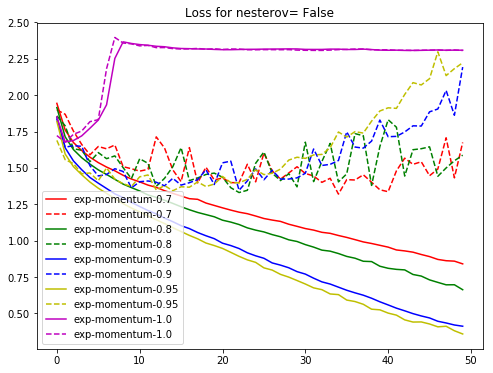

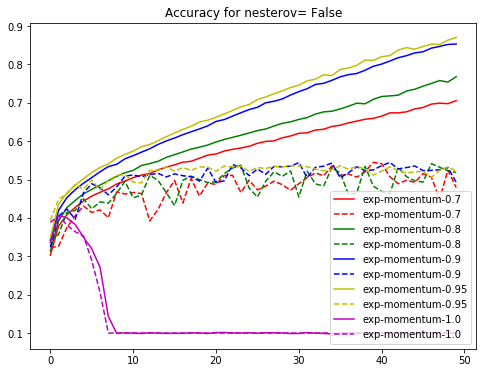

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss for nesterov= False")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy for nesterov= False")
plt.legend()
plt.show()